In [ ]:
import dataset
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
from PIL import Image
from matplotlib import pyplot as plt
import albumentations
import glob
import os
%matplotlib inline
path = "/home/gianscarpe/dev/data/dhp19/time_count_dataset/movements_per_frame/"

In [2]:
from albumentations import *
from albumentations.pytorch import ToTensor
transform_val = Compose([
             ToTensor()
       ])

In [3]:
file_paths = sorted(glob.glob(os.path.join(path, "*.npy")))

In [11]:
d = dataset.get_dataset(file_paths, index=None, preload=False, n_channels=1, preprocess=transform_val)
labels = d.labels
indexes = []
counts = np.zeros(33)
for i, l in zip(d.x_indexes, labels):
    if counts[l] > 999:
        continue
    counts[l] +=1
    indexes.append(i)

In [12]:
indexes = np.array(indexes)

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

<BarContainer object of 33 artists>

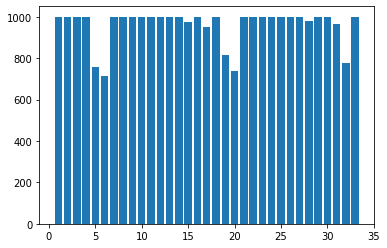

In [24]:
counts = np.zeros(33)
for i in indexes:
    l = d.labels[i]
    counts[l] +=1
plt.bar(np.arange(1, 34), counts.astype('int'))

In [25]:
np.save(os.path.join(path, "preload", 'balanced_indexes.npy'), indexes)

## Create train, val and test split

In [4]:
from utils import generate_indexes

In [5]:
files, train, val, test = generate_indexes.save_npy_indexes_and_map(path, split_at=0.8)

Creating split ...


## Test split

<BarContainer object of 33 artists>

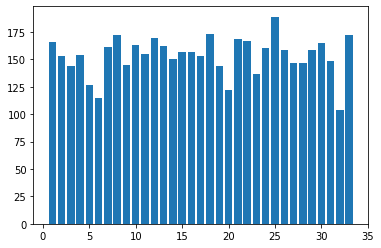

In [32]:
d = dataset.get_dataset(file_paths, index=val, preload=False, n_channels=1, preprocess=transform_val)
counts = np.zeros(33)
for i in d.x_indexes:
    l = d.labels[i]
    counts[l] +=1
plt.bar(np.arange(1, 34), np.array(counts).astype('int'))